In [83]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
from sklearn.metrics import r2_score
plt.style.use('seaborn')
%matplotlib inline 

In [84]:
confirmed_df = pd.read_csv("covid_confirmed_usafacts.csv")

In [85]:
confirmed_df.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,10508,10512,10512,10512,10512,10517,10526,10527,10531,10545
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,38042,38061,38061,38061,38061,38085,38104,38123,38140,38171
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,3691,3691,3691,3691,3691,3695,3699,3700,3700,3701
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,4339,4340,4340,4340,4340,4340,4345,4348,4352,4354


In [86]:
columns = confirmed_df.keys()

In [87]:
confirmed = confirmed_df.loc[:, columns[75]:columns[-4]]

In [88]:
dates = confirmed.keys()
us_cases = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    us_cases.append(confirmed_sum)
print(us_cases)

[252613, 287810, 321731, 346225, 376027, 406319, 438906, 473113, 506404, 556884, 565308, 590154, 615913, 645776, 679112, 710369, 738781, 764006, 789646, 815432, 843871, 875661, 913075, 947655, 973323, 996037, 1021617, 1049552, 1079521, 1112398, 1142901, 1167730, 1189202, 1213506, 1237737, 1265923, 1293235, 1318592, 1338927, 1356493, 1378967, 1400655, 1427972, 1453650, 1478505, 1497229, 1518549, 1540231, 1562946, 1589236, 1612766, 1635452, 1655947, 1673976, 1691555, 1713253, 1737091, 1762522, 1785415, 1804338, 1825074, 1846866, 1868242, 1890164, 1919050, 1942836, 1961187, 1977751, 1997200, 2019210, 2042790, 2068788, 2095714, 2116681, 2135790, 2163895, 2191149, 2221296, 2255629, 2290514, 2319021, 2346689, 2384857, 2425725, 2469815, 2519449, 2566984, 2608868, 2644944, 2694290, 2748312, 2806105, 2866715, 2918294, 2961377, 3005772, 3063058, 3126495, 3192392, 3262670, 3328099, 3387690, 3442002, 3511594, 3577688, 3650114, 3729444, 3796011, 3856796, 3911622, 3976239, 4042692, 4110008, 4183455,

In [89]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
us_cases = np.array(us_cases).reshape(-1, 1)
print(us_cases)

[[  252613]
 [  287810]
 [  321731]
 [  346225]
 [  376027]
 [  406319]
 [  438906]
 [  473113]
 [  506404]
 [  556884]
 [  565308]
 [  590154]
 [  615913]
 [  645776]
 [  679112]
 [  710369]
 [  738781]
 [  764006]
 [  789646]
 [  815432]
 [  843871]
 [  875661]
 [  913075]
 [  947655]
 [  973323]
 [  996037]
 [ 1021617]
 [ 1049552]
 [ 1079521]
 [ 1112398]
 [ 1142901]
 [ 1167730]
 [ 1189202]
 [ 1213506]
 [ 1237737]
 [ 1265923]
 [ 1293235]
 [ 1318592]
 [ 1338927]
 [ 1356493]
 [ 1378967]
 [ 1400655]
 [ 1427972]
 [ 1453650]
 [ 1478505]
 [ 1497229]
 [ 1518549]
 [ 1540231]
 [ 1562946]
 [ 1589236]
 [ 1612766]
 [ 1635452]
 [ 1655947]
 [ 1673976]
 [ 1691555]
 [ 1713253]
 [ 1737091]
 [ 1762522]
 [ 1785415]
 [ 1804338]
 [ 1825074]
 [ 1846866]
 [ 1868242]
 [ 1890164]
 [ 1919050]
 [ 1942836]
 [ 1961187]
 [ 1977751]
 [ 1997200]
 [ 2019210]
 [ 2042790]
 [ 2068788]
 [ 2095714]
 [ 2116681]
 [ 2135790]
 [ 2163895]
 [ 2191149]
 [ 2221296]
 [ 2255629]
 [ 2290514]
 [ 2319021]
 [ 2346689]
 [ 2384857]
 [ 2

In [90]:
days_in_future = 90
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-90]

In [91]:
start ='01/22/2021'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [92]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, us_cases, test_size=0.15, shuffle=False) 

In [93]:
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge()
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


/Users/money/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(cv=3, estimator=BayesianRidge(), n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'tol': [0.0001, 0.001, 0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [94]:
bayesian_search.best_params_

{'tol': 0.0001,
 'lambda_2': 1e-05,
 'lambda_1': 1e-05,
 'alpha_2': 1e-07,
 'alpha_1': 1e-06}

In [95]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))
rsq=r2_score(test_bayesian_pred, y_test_confirmed)
print('r square:', rsq)

MAE: 240820.00227345567
MSE: 147337800893.65308
r square: 0.9712810587110151


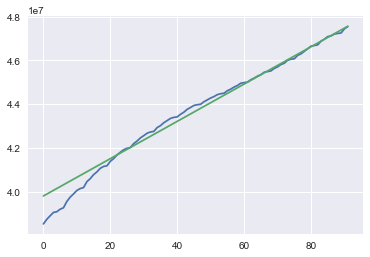

In [96]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)

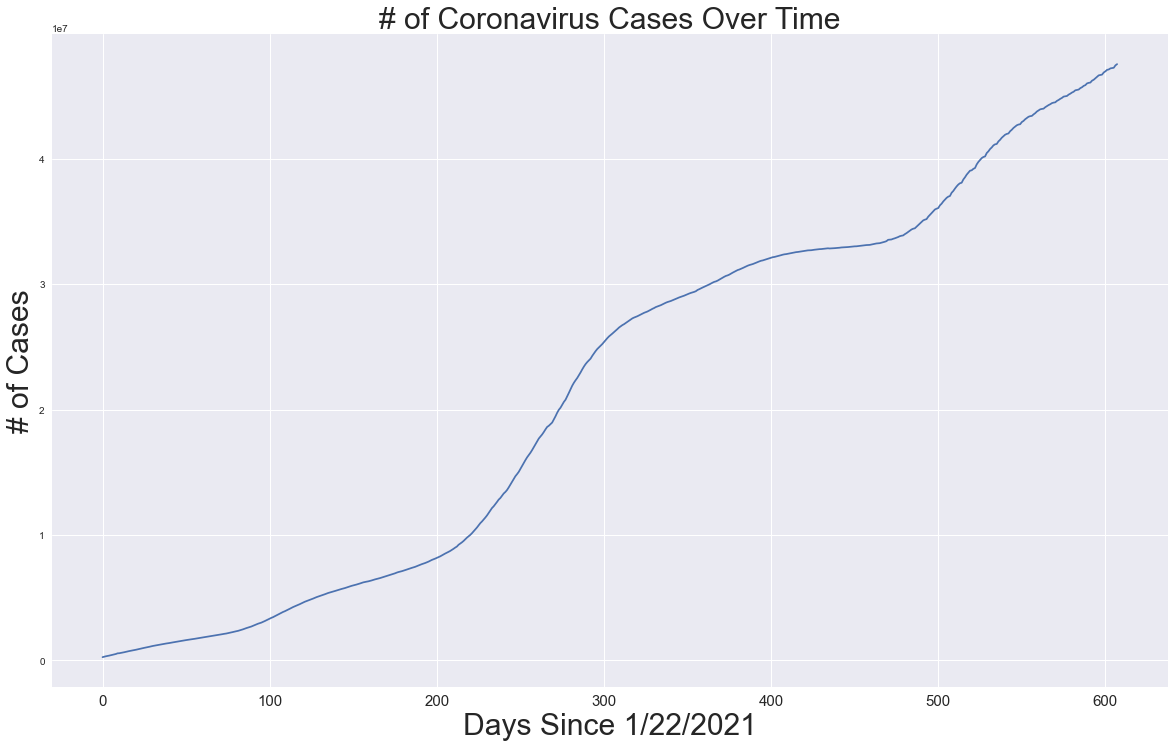

In [97]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, us_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2021', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()

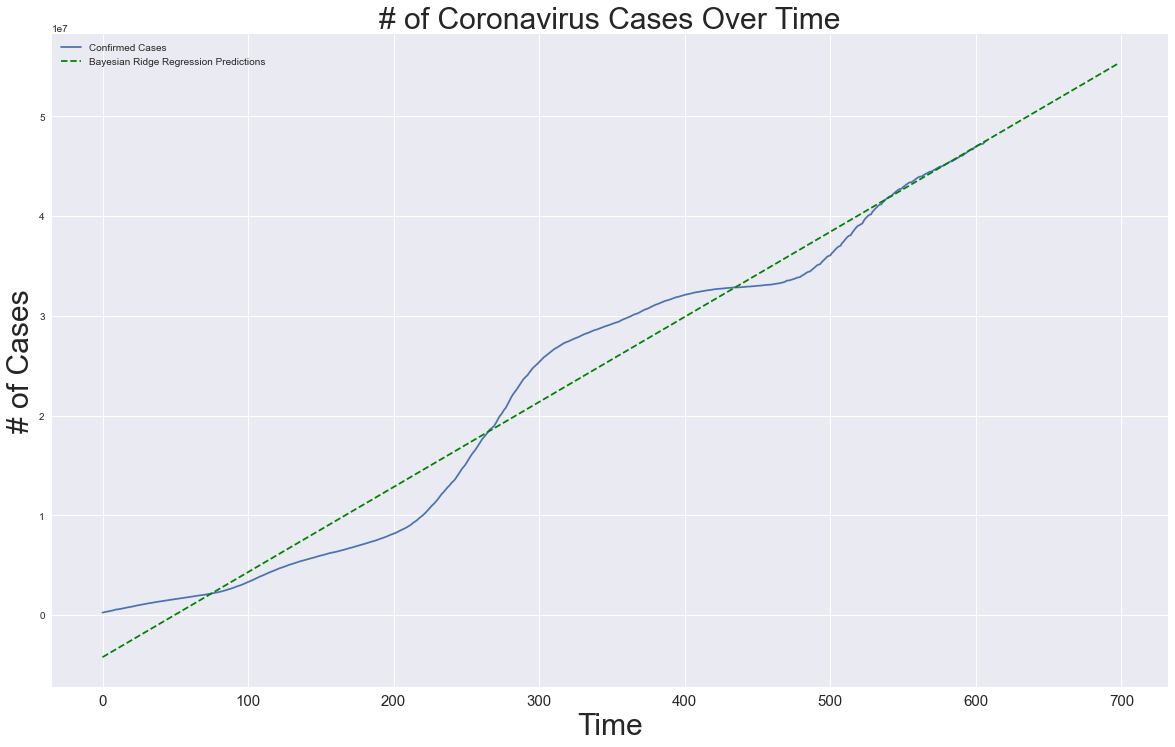

In [98]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, us_cases)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [100]:
print('Ridge regression future predictions:')
set(zip(bayesian_pred[-90:]))

Ridge regression future predictions:


{(47644533.25958246,),
 (47729823.891365096,),
 (47815114.52314774,),
 (47900405.154930376,),
 (47985695.78671301,),
 (48070986.418495655,),
 (48156277.05027829,),
 (48241567.682060935,),
 (48326858.31384357,),
 (48412148.94562621,),
 (48497439.57740885,),
 (48582730.209191486,),
 (48668020.84097413,),
 (48753311.472756766,),
 (48838602.10453941,),
 (48923892.736322045,),
 (49009183.36810468,),
 (49094473.999887325,),
 (49179764.63166996,),
 (49265055.263452604,),
 (49350345.89523524,),
 (49435636.52701788,),
 (49520927.15880052,),
 (49606217.790583156,),
 (49691508.4223658,),
 (49776799.054148436,),
 (49862089.68593108,),
 (49947380.317713715,),
 (50032670.94949635,),
 (50117961.581278995,),
 (50203252.21306163,),
 (50288542.844844274,),
 (50373833.47662691,),
 (50459124.10840955,),
 (50544414.74019219,),
 (50629705.371974826,),
 (50714996.00375747,),
 (50800286.635540105,),
 (50885577.26732274,),
 (50970867.899105385,),
 (51056158.53088802,),
 (51141449.162670664,),
 (51226739.794453